# Dự báo mức lương kỹ sư IT

**Thành viên**

Mai Xuân Trường: Crawl dữ liệu, trực quán hoá đơn biến dữ liệu thô.

Trần Hữu Tuân: Làm sạch và chuẩn hoá dữ liệu, trực quan hoá so sánh trước và sau khi làm sạch và chuẩn hoá.

Đoàn Nguyễn Sơn Hải: Trực quan hoá mối quan hệ đa biến, đưa ra quy các mối quan hệ tiềm ẩn.

# Giới thiệu

Bài toán dự báo mức lương của kỹ sư IT là một bài toán trong lĩnh vực khoa học dữ liệu nhằm dự đoán về mức lương của các nhân viên công nghệ thông tin dựa trên các thông tin có sẵn như địa điểm làm việc, cấp bậc, số năm kinh nghiệm, kỹ năng, hình thức làm việc và giới tính. Bài toán này có thể giúp các doanh nghiệp hoặc ứng viên có cái nhìn tổng quan về mức lương trong ngành công nghệ thông tin, từ đó có thể đưa ra quyết định phù hợp trong việc tuyển dụng, đào tạo và đề xuất chính sách lương thích hợp.

# Crawl dữ liệu

**Tên dataset**: Bộ dữ liệu về Tuyển dụng trong lĩnh vực Công nghệ thông tin từ TopCV

**Nguồn:** từ trang web TopCV (cụ thể là phần việc làm IT)

**Mô tả chung:** Bộ dữ liệu này bao gồm thông tin về các bài tuyển dụng trong lĩnh vực Công nghệ thông tin thu thập từ trang web TopCv. Dữ liệu này có thể được sử dụng để dự đoán mức lương cho cho các nhân viên IT dựa vào thông tin về vị trí, địa điểm, số năm kinh nghiệm, kĩ năng (như ngôn ngữ lập trình, ngoại ngữ, ...), giới tính.

**Các biến dữ liệu lấy về**

Title: Tiêu đề của bài tuyển dụng.

Link: Đường dẫn đến bài tuyển dụng trên trang web TopCv.

Company: Tên công ty đăng bài tuyển dụng.

Salary: Mức lương hoặc khoảng lương được đề xuất.

Locations: Địa điểm làm việc.

Level: Cấp bậc của vị trí tuyển dụng.

Year of Experience: Số năm kinh nghiệm yêu cầu.

Contract Type: Loại hình làm việc (toàn thời gian, bán thời gian, ...).

Sex: Yêu cầu giới tính (nếu có).

Skills: Các kỹ năng yêu cầu cho vị trí tuyển dụng.

**Công cụ hỗ trợ crawl dữ liệu**

In [1]:
import pandas as pd
df = pd.read_csv('raw.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3186 entries, 0 to 3185
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Title               3186 non-null   object
 1   Link                3186 non-null   object
 2   Company             3186 non-null   object
 3   Salary              3186 non-null   object
 4   Locations           3186 non-null   object
 5   Level               3161 non-null   object
 6   Year of Experience  3161 non-null   object
 7   Contract Type       3161 non-null   object
 8   Sex                 3161 non-null   object
 9   Skills              3161 non-null   object
dtypes: object(10)
memory usage: 249.0+ KB


Số mẫu bị thiếu thông tin

In [5]:
df['Title'].count() - df['Level'].count()

25

**Những biến quan trong**

-Salary

-Locations

-Level

-Year of Experience

-Contract Type	

-Sex

-Skills

**Trực quan hoá đơn biến dữ liệu thô**

Import thư viện

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

Đọc dữ liệu từ file raw data.csv

In [9]:
data = pd.read_csv('raw.csv')
data.head()

,Title,Link,Company,Salary,Locations,Level,Year of Experience,Contract Type,Sex,Skills
0,Nhân Viên Xử Lý Dữ Liệu Tiếng Nhật (Tiếng Nhật...,https://www.topcv.vn/viec-lam/nhan-vien-xu-ly-...,CHI NHÁNH CÔNG TY TNHH PASONA TECH VIỆT NAM TẠ...,Thoả thuận,Hà Nội,Nhân viên,Không yêu cầu kinh nghiệm,Toàn thời gian,Không yêu cầu,"- Tốt nghiệp đại học, cao đẳng.\n- Tiếng Nhật ..."
1,Java Core Backend Developer -Lương Từ 16 - 25 ...,https://www.topcv.vn/brand/congnghiepvienthong...,TẬP ĐOÀN CÔNG NGHIỆP - VIỄN THÔNG QUÂN ĐỘI,16 - 25 triệu,Hà Nội,Nhân viên,2 năm,Toàn thời gian,Không yêu cầu,1. Trình độ: Tốt nghiệp đại học loại khá trở l...
2,QC Tester/Manual Tester Tiếng Anh Cơ Bản - Lươ...,https://www.topcv.vn/viec-lam/qc-tester-manual...,Công Ty TNHH Mediastep Software Việt Nam,30 - 43 triệu,Hồ Chí Minh,Nhân viên,2 năm,Toàn thời gian,Không yêu cầu,Good at English.At least 2 years hands-on expe...
3,Trưởng Phòng Kỹ Thuật Giải Pháp Lương + Thưởng...,https://www.topcv.vn/viec-lam/truong-phong-ky-...,CÔNG TY TNHH CÔNG NGHỆ VÀ GIẢI PHÁP THÔNG MINH,15 - 30 triệu,Hà Nội,Trưởng/Phó phòng,2 năm,Toàn thời gian,Không yêu cầu,- Nam Tốt nghiệp Đại học chuyên ngành CNTT.\n-...
4,Tester Leader/Trưởng Nhóm Kiểm Thử - Lương Up ...,https://www.topcv.vn/viec-lam/tester-leader-tr...,CÔNG TY TNHH FIVE-STAR E-LEARNING,20 - 25 triệu,Hà Nội,Trưởng nhóm,3 năm,Toàn thời gian,Không yêu cầu,Có ít nhất 3 năm kinh nghiệm Test phần mềm các...


**Trực quan dữ liệu biến Salary**

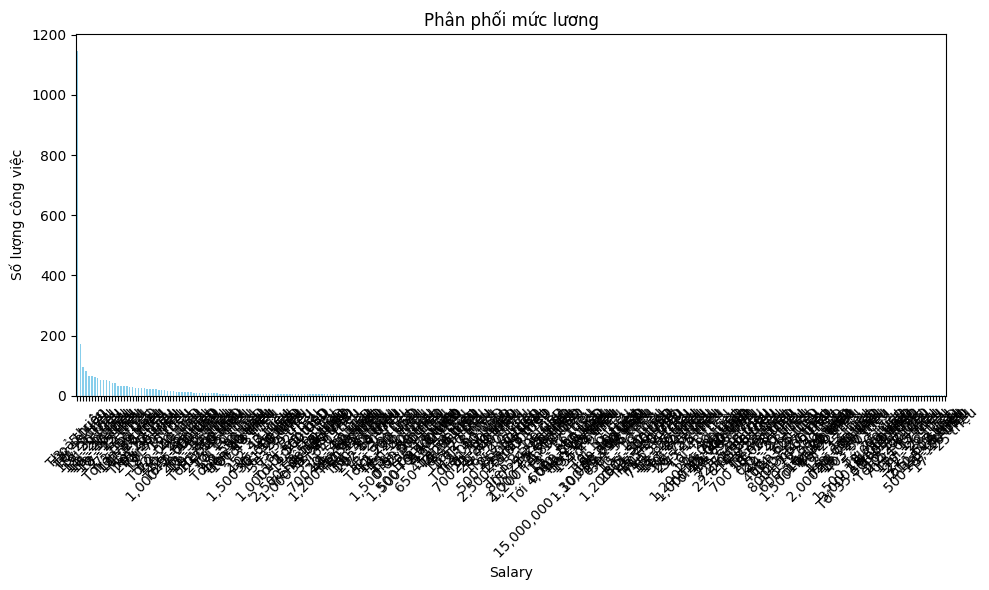

In [10]:
plt.figure(figsize=(10, 6))
data['Salary'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Salary')
plt.ylabel('Số lượng công việc')
plt.title('Phân phối mức lương')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Số lượng danh mục trong biến

In [13]:
df['Salary'].value_counts()

Salary
Thoả thuận       1146
3 - 5 triệu       172
Tới 40 triệu       94
Tới 25 triệu       81
15 - 25 triệu      67
                 ... 
1.5 - 3 triệu       1
18 - 24 triệu       1
3 - 8 triệu         1
5 - 18 triệu        1
17 - 25 triệu       1
Name: count, Length: 299, dtype: int64

**Trực quan dữ liệu biến Locations**

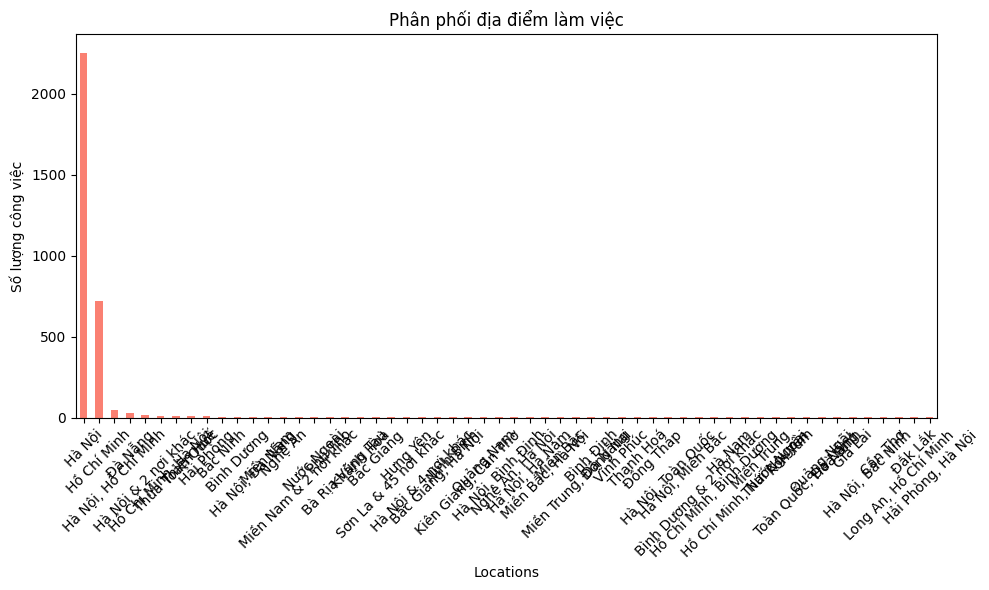

In [14]:
plt.figure(figsize=(10, 6))
data['Locations'].value_counts().plot(kind='bar', color='salmon')
plt.xlabel('Locations')
plt.ylabel('Số lượng công việc')
plt.title('Phân phối địa điểm làm việc')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Số lượng danh mục trong biến

In [15]:
df['Locations'].value_counts()

Locations
Hà Nội                     2255
Hồ Chí Minh                 720
Hà Nội, Hồ Chí Minh          49
Đà Nẵng                      28
Hà Nội & 2 nơi khác          16
Hồ Chí Minh, Hà Nội          12
Thừa Thiên Huế                8
Toàn Quốc                     8
Hải Phòng                     7
Bắc Ninh                      6
Bình Dương                    5
Hà Nội, Đà Nẵng               5
Miền Nam                      4
Nghệ An                       4
Miền Nam & 2 nơi khác         4
Nước Ngoài                    3
Phú Thọ                       3
Bà Rịa-Vũng Tàu               3
Khánh Hoà                     3
Bắc Giang                     2
Sơn La & 45 nơi khác          2
Hưng Yên                      2
Hà Nội & 4 nơi khác           2
Bắc Giang, Hà Nội             2
Ninh Bình                     2
Kiên Giang, Cần Thơ           1
Quảng Nam                     1
Hà Nội, Bình Định             1
Nghệ An, Hà Nội               1
Hà Nội, Hà Nam                1
Miền Bắc, Hà Nội              

**Trực quan dữ liệu biến Level**

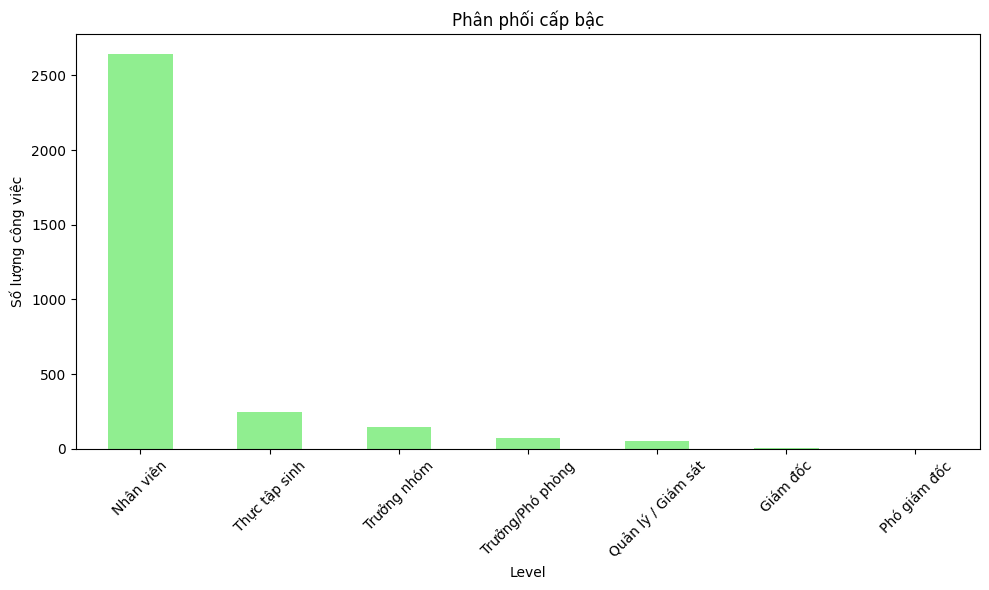

In [16]:
plt.figure(figsize=(10, 6))
data['Level'].value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel('Level')
plt.ylabel('Số lượng công việc')
plt.title('Phân phối cấp bậc')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Trực quan dữ liệu biến Year of Experience**

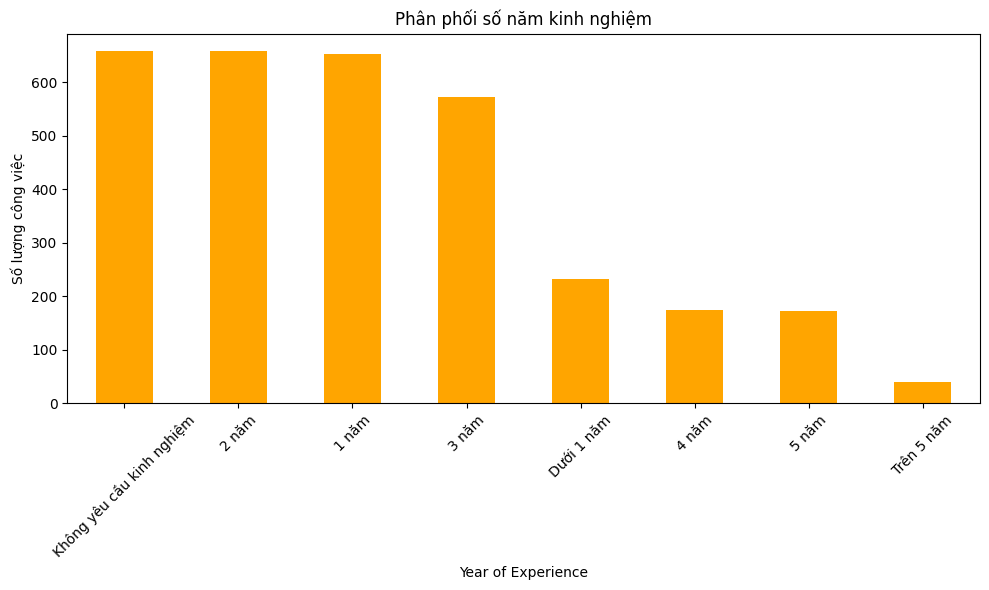

In [17]:
plt.figure(figsize=(10, 6))
data['Year of Experience'].value_counts().plot(kind='bar', color='orange')
plt.xlabel('Year of Experience')
plt.ylabel('Số lượng công việc')
plt.title('Phân phối số năm kinh nghiệm')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Trực quan dữ liệu biến Contract Type**

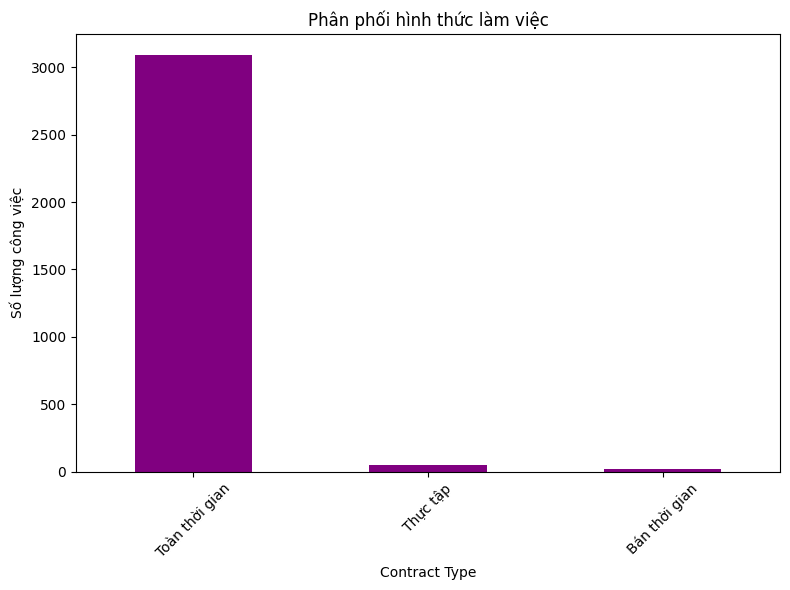

In [18]:
plt.figure(figsize=(8, 6))
data['Contract Type'].value_counts().plot(kind='bar', color='purple')
plt.xlabel('Contract Type')
plt.ylabel('Số lượng công việc')
plt.title('Phân phối hình thức làm việc')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Trực quan biến sex**

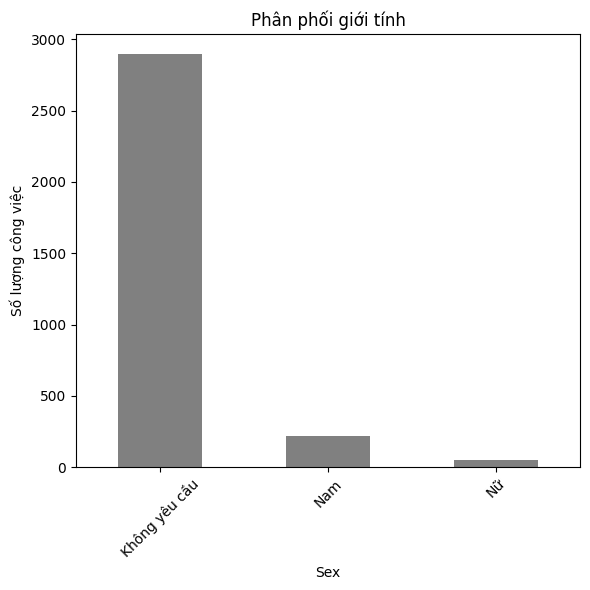

In [19]:
plt.figure(figsize=(6, 6))
data['Sex'].value_counts().plot(kind='bar', color='gray')
plt.xlabel('Sex')
plt.ylabel('Số lượng công việc')
plt.title('Phân phối giới tính')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Làm sạch và chuẩn hoá

# Lựa chọn biến mục tiêu, biến quan trong

**Biến mục tiêu:** Salary